# Linear Approximation

approximate $f(x) = 10(x-1)^2 - 1, x\in[1,2]$ by $u(x) \in V$, where $V=\text{span} \{1, x\}$. Specifically, $u(x) = c_0 \psi_0(x) + c_1 \psi_1(x)$, where $\psi_0(x) = 1$ and $\psi_1(x)=x$.

## Least square method 

- express $u(x) = \sum_{i=0}^{N} c_i \psi_i(x)$, where $N$ is the number of basis functions
- solve $\{c_i\}_{i=0}^{N}$ by minimizing $E = \|f-u\|^2 = (f-u, f-u)$ through setting $\frac{\partial E}{\partial c_i} = 0$

Finally we get following

$$ \sum_{j=0}^{N}c_i(\psi_j, \psi_i) = (f, \psi_i)$$

if we denotes $A_{i,j}=(\psi_i, \psi_j)$, and $b_i=(f, \psi_i)$, then we get the following linear system

$$
\begin{bmatrix}
A_{0,0} & \cdots & A_{0,N} \\
\vdots & \ddots & \vdots \\
A_{N,0} & \cdots & A_{N,N} \\
\end{bmatrix} 
\begin{bmatrix}
c_{0} \\
\vdots \\
c_{N} \\
\end{bmatrix} = 
\begin{bmatrix}
b_{0} \\
\vdots \\
b_{N} \\
\end{bmatrix}
$$

## Regression method 

In many applications, we only know $\{f(x_1), \cdots, f(x_m) \}$, where $m$ is the number of sample points, usually $m \gg N$. In this condition, we can approxiamte $f$ as follows

- express $u(x_i) = \sum_{j=0}^{N} c_j \psi_j(x_i) = f(x_i), i = 0, 1, \cdots, m$, which can be written in matrix form as $Ac = b$, where $A_{i,j} = \psi_j(x_i), b_i=f(x_i)$.
- solve $c$ by minimizing the squared Euclidean norm of residual $\|r\|^2 = \| b - Ac \|^2 = \sum_{i}(b_i - \sum_j A_{i,j} c_j)^2$. Setting $\frac{\partial \|r\|^2}{\partial c_k} = 0, k=0, \cdots, N.$

Finally we get the following matrix form, 
$$A^T A c = A^T b$$
If we denote $B = A^T A$ and $d = A^T b$, we have 
$$B_{ij} = \sum_{k} A^T_{i,k} A_{k,j} = \sum_{k} A_{k,i} A_{k,j} = \sum_{k=0}^m \psi_i(x_k) \psi_j(x_k)$$
$$d_{i} = \sum_{k} A^T_{i,k} b_{k} = \sum_{k} A_{k,i} b_{k} = \sum_{k=0}^m \psi_i(x_k) f(x_k)$$
then we can obtain $c$ by solve linear system $Bc = d$

In [4]:
import sympy as sym 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def regression(f, psi, points):
    N = len(psi)
    m = len(points)

    # init B, d
    B = np.zeros((N, N))
    d = np.zeros(N)

    # wrap psi, f to python function
    x = sym.Symbol('x')
    psi_sym = psi
    psi = [sym.lambdify(x, psi[i]) for i in range(N)]
    f = sym.lambdify(x, f)

    for i in range(N):
        for j in range(N):
            
            for k in range(m):
                B[i,j] += psi[i](points[k]) * psi[j](points[k])

        for k in range(m):
            d[i] += psi[i](points[k]) * f(points[k])

    c = np.linalg.solve(B, d)
    u = 0
    for i in range(N):
        u += c[i]*psi_sym[i]
    return u, c

exact 10*x**2 - 20*x + 9
2 3.88429752066115*x**2 - 1.65289256198347*x - 3.23140495867769
8 9.99999999999994*x**2 - 19.9999999999998*x + 8.99999999999978
16 9.99999999999735*x**2 - 19.999999999992*x + 8.99999999999423


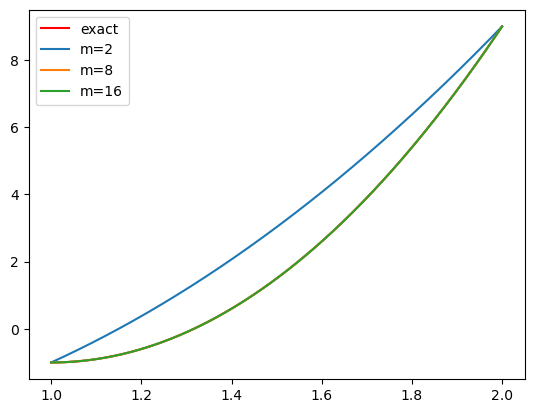

In [19]:
x = sym.Symbol('x')
f = 10*(x-1)**2 - 1
print('exact', sym.expand(f))
psi = [1, x, x**2]
Omega = [1, 2]

f_sym = sym.lambdify(x, f, 'numpy')
resolution = 401
xcoor = np.linspace(Omega[0], Omega[1], resolution)
exact = f_sym(xcoor)
plt.plot(xcoor, exact, '-r', label='exact')

for m in [2, 8, 16]:
    points = np.linspace(Omega[0], Omega[1], m)
    u, c = regression(f, psi, points)
    print(m, u)
    u_sym = sym.lambdify(x, u, modules='numpy')
    approx = u_sym(xcoor)    
    plt.plot(xcoor, approx, label='m={:}'.format(m))
plt.legend()